In [2]:
import pandas as pd

In [17]:
CCTV_Seoul = pd.read_csv('C:\dev\5th_edu\Session_04\데이터셋\CCTV_in_Seoul.csv', encoding = 'python')
CCTV_Seoul.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 25: invalid start byte

In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_Seoul.columns[0]

'기관명'

In [4]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace = True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [5]:
CCTV_Seoul.columns.values[0] = '지역구별'

In [7]:
CCTV_Seoul.head()

,지역구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [15]:
CCTV_Seoul.columns.values[0] = '구별'

In [13]:
pop_Seoul = pd.read_excel('C:\dev\5th_edu\Session_04\데이터셋\\CCTV_in_Seoul.xls', header = 2, parse_cols = 'B, D, G, J, N', encoding = 'utf-8')
pop_Seoul.head()

C:\Users\jungbin\Anaconda3\envs\gh\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  """Entry point for launching an IPython kernel.


OSError: [Errno 22] Invalid argument: 'C:\\dev\x05th_edu\\Session_04\\데이터셋\\CCTV_in_Seoul.xls'

In [7]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                            pop_Seoul.columns[1] : '인구수', 
                            pop_Seoul.columns[2]: '한국인', 
                            pop_Seoul.columns[3]: '외국인', 
                            pop_Seoul.columns[4]: '고령자'}, inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [ ]:
CCTV_Seoul.head()

In [ ]:
CCTV_Seoul.sort_values(by = '소계', ascending = True).head(5)

In [22]:
CCTV_Seoul.sort_values(by = '소계', ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [8]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100

In [24]:
CCTV_Seoul.head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [25]:
CCTV_Seoul.sort_values(by='최근증가율', ascending = False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [26]:
pop_Seoul.head(5)

,구별,인구수,한국인,외국인,고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [9]:
pop_Seoul.drop([0], inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767
5,광진구,371063,355559,15504,45619


In [28]:
pop_Seoul['구별'].unique

<bound method Series.unique of 1      종로구
2       중구
3      용산구
4      성동구
5      광진구
6     동대문구
7      중랑구
8      성북구
9      강북구
10     도봉구
11     노원구
12     은평구
13    서대문구
14     마포구
15     양천구
16     강서구
17     구로구
18     금천구
19    영등포구
20     동작구
21     관악구
22     서초구
23     강남구
24     송파구
25     강동구
Name: 구별, dtype: object>

In [18]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율


In [24]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163026,153065,9961,26742,6.110068,16.403518
2,중구,135633,125725,9908,22005,7.305007,16.223928
3,용산구,245090,228999,16091,37640,6.565343,15.357624
4,성동구,316463,308221,8242,42767,2.604412,13.514060
5,광진구,371063,355559,15504,45619,4.178266,12.294139


In [25]:
pop_Seoul.sort_values(by = '인구수', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,673507,666635,6872,81364,1.020331,12.080647
16,강서구,603611,596949,6662,79660,1.103691,13.197241
11,노원구,548160,543752,4408,77096,0.804145,14.064507
23,강남구,547453,542364,5089,67085,0.929578,12.254020
21,관악구,520040,501957,18083,72249,3.477233,13.892970


In [26]:
pop_Seoul.sort_values(by = '외국인', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,403600,367778,35822,55673,8.875619,13.794103
17,구로구,438486,404497,33989,61801,7.751445,14.094179
18,금천구,254021,233917,20104,35739,7.914306,14.069309
21,관악구,520040,501957,18083,72249,3.477233,13.892970
6,동대문구,364338,348052,16286,57165,4.470025,15.690101


In [27]:
pop_Seoul.sort_values(by = '고령자', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,673507,666635,6872,81364,1.020331,12.080647
16,강서구,603611,596949,6662,79660,1.103691,13.197241
12,은평구,487666,483197,4469,77420,0.916406,15.875620
11,노원구,548160,543752,4408,77096,0.804145,14.064507
21,관악구,520040,501957,18083,72249,3.477233,13.892970


In [28]:
pop_Seoul.sort_values(by = '외국인비율', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,403600,367778,35822,55673,8.875619,13.794103
18,금천구,254021,233917,20104,35739,7.914306,14.069309
17,구로구,438486,404497,33989,61801,7.751445,14.094179
2,중구,135633,125725,9908,22005,7.305007,16.223928
3,용산구,245090,228999,16091,37640,6.565343,15.357624


In [21]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252


In [29]:
pop_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,163026,153065,9961,26742,6.110068,16.403518
2,중구,135633,125725,9908,22005,7.305007,16.223928
3,용산구,245090,228999,16091,37640,6.565343,15.357624


In [30]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on = '구별')
data_result.head()

KeyError: '구별'

In [38]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020
1,강동구,1010,166.490765,431920,427573,4347,58770,1.006436,13.606686
2,강북구,831,125.203252,322915,319164,3751,58196,1.161606,18.022080
3,강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241
4,관악구,2109,149.290780,520040,501957,18083,72249,3.477233,13.892970


In [39]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,송파구,1081,104.347826,673507,666635,6872,81364,1.020331,12.080647
3,강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241
8,노원구,1566,188.929889,548160,543752,4408,77096,0.804145,14.064507
0,강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020
4,관악구,2109,149.290780,520040,501957,18083,72249,3.477233,13.892970


In [40]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020
강동구,1010,166.490765,431920,427573,4347,58770,1.006436,13.606686
강북구,831,125.203252,322915,319164,3751,58196,1.161606,18.022080
강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241
관악구,2109,149.290780,520040,501957,18083,72249,3.477233,13.892970


In [42]:
import numpy as np
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.27474224],
       [-0.27474224,  1.        ]])

In [43]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.05057013],
       [-0.05057013,  1.        ]])

In [44]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[ 1.        ,  0.22152789],
       [ 0.22152789,  1.        ]])

In [45]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020
양천구,2482,34.671731,468145,464185,3960,58045,0.845892,12.398936
서초구,2297,63.371266,438163,433951,4212,54751,0.961286,12.495578
관악구,2109,149.290780,520040,501957,18083,72249,3.477233,13.892970
은평구,2108,85.237258,487666,483197,4469,77420,0.916406,15.875620


In [46]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,1081,104.347826,673507,666635,6872,81364,1.020331,12.080647
강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241
노원구,1566,188.929889,548160,543752,4408,77096,0.804145,14.064507
강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020
관악구,2109,149.290780,520040,501957,18083,72249,3.477233,13.892970


In [49]:
import matplotlib.pyplot as plt #matplotlib가 한글폰트를 지원 안해서 미리 처리해주는 과정
import platform                 #아마 요즘 matplotlib는 이런거 안해도 잘 될수도 있어요!

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':#윈도우 사용자
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [50]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020
강동구,1010,166.490765,431920,427573,4347,58770,1.006436,13.606686
강북구,831,125.203252,322915,319164,3751,58196,1.161606,18.022080
강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241
관악구,2109,149.290780,520040,501957,18083,72249,3.477233,13.892970


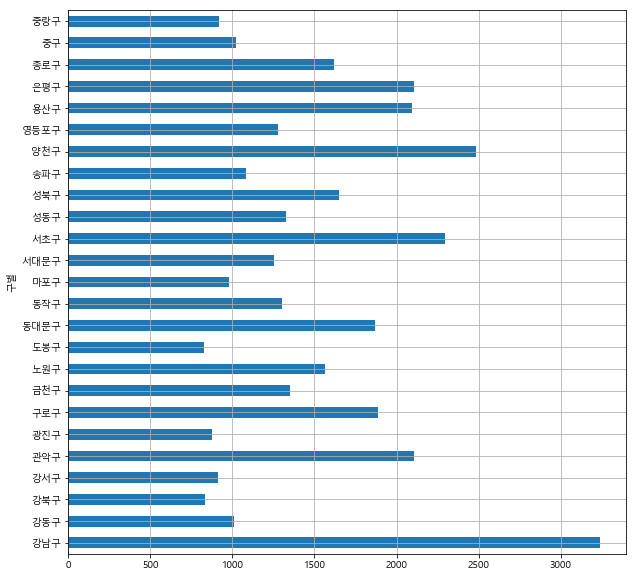

In [54]:
data_result['소계'].plot(kind='barh',grid=True, figsize=(10,10)) #bar는 수직바, barh는 수평바(horizontal)
plt.show()

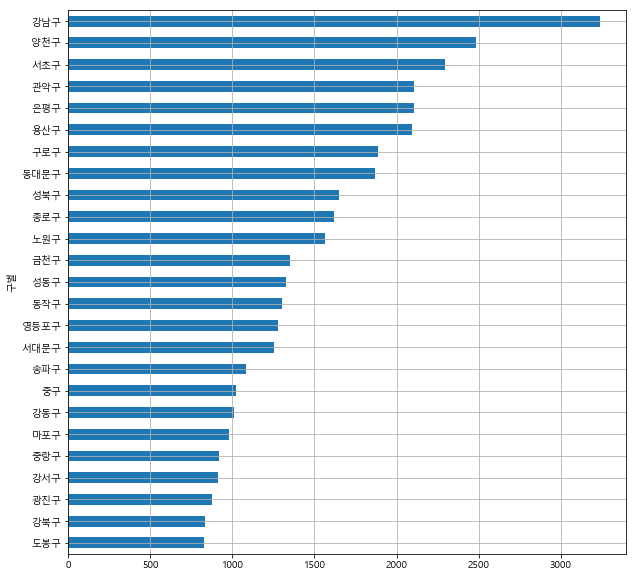

In [55]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

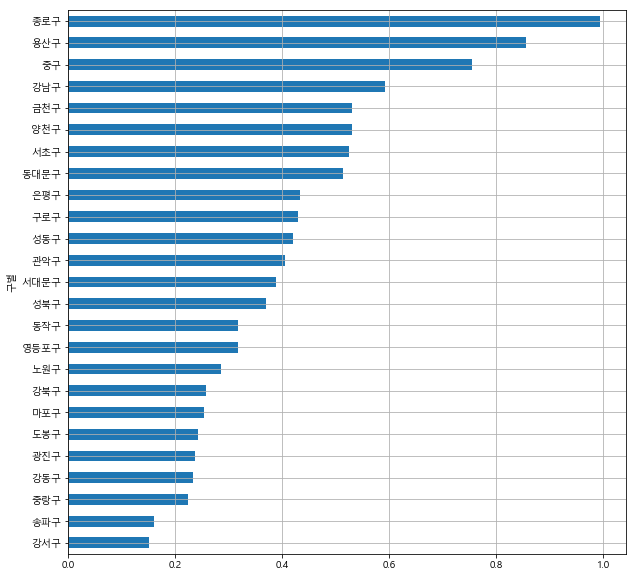

In [58]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

In [1]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

NameError: name 'plt' is not defined

In [60]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([  1.07336946e-03,   1.08384235e+03])

In [65]:
f1=np.poly1d(fp1) #1차 polynomial(다항식) 자료형으로 만들라는 의미
fx=np.linspace(100000,700000,100) 

In [67]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020,0.591466,1566.538319
양천구,2482,34.671731,468145,464185,3960,58045,0.845892,12.398936,0.530178,895.665104
강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241,0.150925,820.739963
용산구,2096,53.216374,245090,228999,16091,37640,6.565343,15.357624,0.855196,749.085528
서초구,2297,63.371266,438163,433951,4212,54751,0.961286,12.495578,0.524234,742.846867


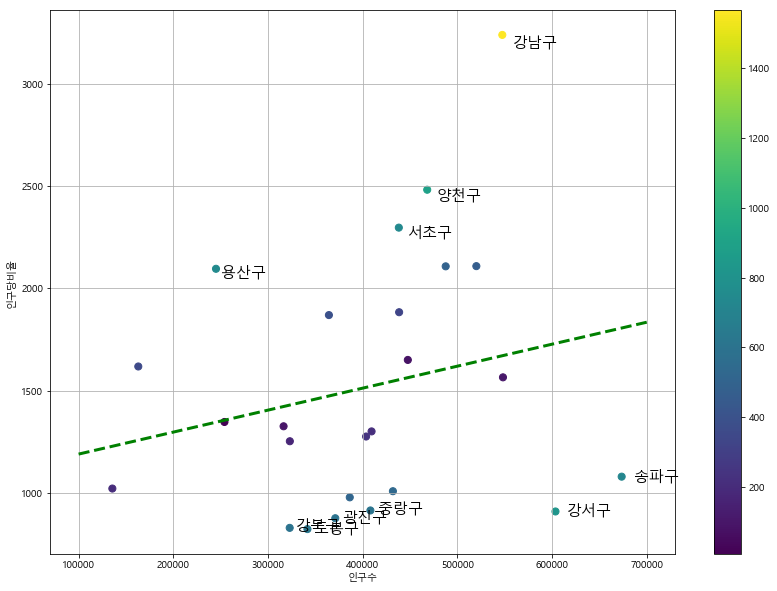

In [68]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], c =data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()